# Compatibility intervalについて: 補足資料

In [1]:
#| echo: false
setwd("../../../")
renv::activate()
.libPaths(renv::paths$library())

- renv activated -- please restart the R session.


In [2]:
library("ggplot2")
library("gridExtra")

set.seed(42)

# 二項検定のP値関数

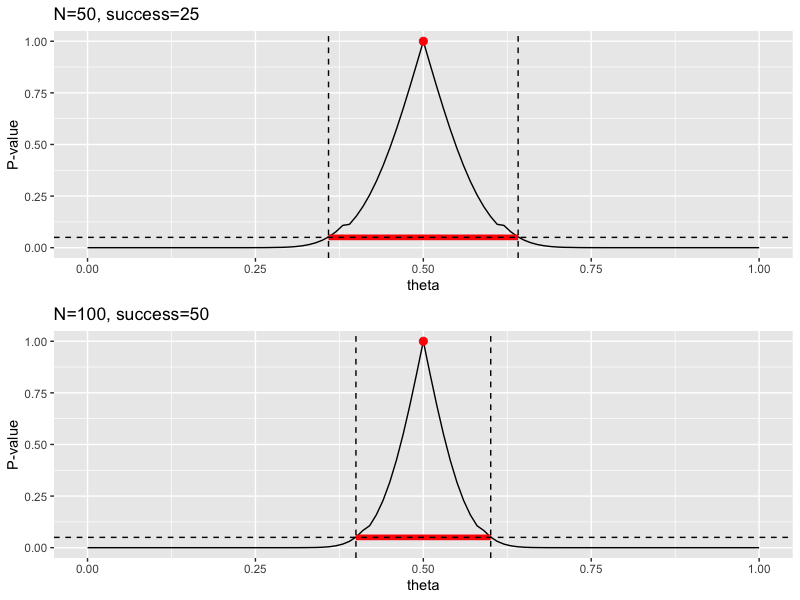

In [3]:
#| label: fig-binormtest-pvalue
#| fig-cap: "二項検定のP値関数"
#| fig-subcap: "黒線はP値関数、赤線は95%信頼区間、赤点は最大尤度"

alpha <- 0.05

x <- (0:100) / 100

y1 <- sapply(x, function(t) binom.test(25, 50, t)$p.value)
lh1 <- x[which.max(y1)]
cl1 <- uniroot(function(t) binom.test(25, 50, t)$p.value - alpha, c(0.0, 0.5))$root
cu1 <- uniroot(function(t) binom.test(25, 50, t)$p.value - alpha, c(0.5, 1.0))$root

g1 <- ggplot(mapping=aes(x=x, y=y1)) +
  geom_line() +
  geom_line(mapping=aes(x=c(cl1, cu1), y=c(alpha, alpha)), color="red", linewidth=2) +
  geom_point(mapping=aes(x=c(lh1), y=c(max(y1))), color="red", size=2.5) +
  geom_hline(yintercept=alpha, linetype="dashed") +
  geom_vline(xintercept=cl1, linetype="dashed") +
  geom_vline(xintercept=cu1, linetype="dashed") +
  labs(
    title="N=50, success=25",
    x="theta",
    y="P-value",
  )

y2 <- sapply(x, function(t) binom.test(50, 100, t)$p.value)
lh2 <- x[which.max(y2)]
cl2 <- uniroot(function(t) binom.test(50, 100, t)$p.value - alpha, c(0.0, 0.5))$root
cu2 <- uniroot(function(t) binom.test(50, 100, t)$p.value - alpha, c(0.5, 1.0))$root

g2 <- ggplot(mapping=aes(x=x, y=y2)) +
  geom_line() +
  geom_line(mapping=aes(x=c(cl2, cu2), y=c(alpha, alpha)), color="red", linewidth=2) +
  geom_point(mapping=aes(x=c(lh2), y=c(max(y2))), color="red", size=2.5) +
  geom_hline(yintercept=alpha, linetype="dashed") +
  geom_vline(xintercept=cl2, linetype="dashed") +
  geom_vline(xintercept=cu2, linetype="dashed") +
  labs(
    title="N=100, success=50",
    x="theta",
    y="P-value",
  )

grid.arrange(g1, g2)

In [4]:
print(c(cl1, cu1, lh1))
print(c(cl2, cu2, lh2))

[1] 0.3588326 0.6411674 0.5000000
[1] 0.3996556 0.6003444 0.5000000
